# Free Flame Example

This example uses `ctwrap` for one-dimensional adiabatic premixed flame simulations defined by the simulation module `freeflame` (`ctwrap.modules.freeflame`).

## Function/Class Definitions

In [1]:
import cantera as ct
import ctwrap as cw
import json

## Simulations

### Create Simulation Object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [2]:
sim = cw.Simulation.from_module(cw.modules.freeflame)
sim

### Create Simulation Handler

In [3]:
fname = 'freeflame.yaml'
s = cw.SimulationHandler.from_yaml(fname, strategy='matrix', verbosity=1)
s

Simulations for entries ['upstream.phi', 'model.transport']


### Run Simulation Tasks in Parallel

In [4]:
%%time
s.run_parallel(sim, verbosity=0)

    flamespeed = 0.201060 m/s (mix)

    flamespeed = 0.215236 m/s (multi)

    flamespeed = 0.205173 m/s (soret)

    flamespeed = 1.735115 m/s (mix)

    flamespeed = 1.720500 m/s (multi)

    flamespeed = 1.535611 m/s (soret)

    flamespeed = 2.716008 m/s (mix)

    flamespeed = 2.671855 m/s (multi)

    flamespeed = 2.473064 m/s (soret)

    flamespeed = 3.051440 m/s (mix)

    flamespeed = 2.997041 m/s (multi)

    flamespeed = 2.823779 m/s (soret)

    flamespeed = 2.973848 m/s (mix)

    flamespeed = 2.924944 m/s (multi)

    flamespeed = 2.787100 m/s (soret)

    flamespeed = 2.726691 m/s (mix)

    flamespeed = 2.691647 m/s (multi)

    flamespeed = 2.565048 m/s (soret)

CPU times: user 30.5 ms, sys: 18.6 ms, total: 49 ms
Wall time: 1min 47s


True

## Create Graphical Output

In [5]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

### Load Data

In [6]:
data = h5py.File(s.output_name, 'r')
data.keys()

<KeysViewHDF5 ['case_00', 'case_01', 'case_02', 'case_03', 'case_04', 'case_05', 'case_06', 'case_07', 'case_08', 'case_09', 'case_10', 'case_11', 'case_12', 'case_13', 'case_14', 'case_15', 'case_16', 'case_17']>

In [7]:
data.attrs.keys()

<KeysViewHDF5 ['cases', 'defaults', 'strategy']>

In [8]:
var = json.loads(data.attrs['strategy'])
var

{'matrix': {'upstream.phi': {'mode': 'linspace',
   'limits': [0.4, 2.4],
   'npoints': 6},
  'model.transport': ['mix', 'multi', 'soret']}}

In [9]:
default = json.loads(data.attrs['defaults'])
default

{'upstream': {'T': '300. kelvin',
  'P': '1. atmosphere',
  'phi': 0.55,
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:5'},
 'model': {'mechanism': 'h2o2.yaml', 'transport': 'mix'},
 'domain': {'width': '30 millimeter'}}

In [10]:
up = default.get('upstream')
up

{'T': '300. kelvin',
 'P': '1. atmosphere',
 'phi': 0.55,
 'fuel': 'H2',
 'oxidizer': 'O2:1,AR:5'}

In [11]:
cases = json.loads(data.attrs['cases'])
cases

{'case_00': {'upstream.phi': 0.4, 'model.transport': 'mix'},
 'case_01': {'upstream.phi': 0.4, 'model.transport': 'multi'},
 'case_02': {'upstream.phi': 0.4, 'model.transport': 'soret'},
 'case_03': {'upstream.phi': 0.8, 'model.transport': 'mix'},
 'case_04': {'upstream.phi': 0.8, 'model.transport': 'multi'},
 'case_05': {'upstream.phi': 0.8, 'model.transport': 'soret'},
 'case_06': {'upstream.phi': 1.2, 'model.transport': 'mix'},
 'case_07': {'upstream.phi': 1.2, 'model.transport': 'multi'},
 'case_08': {'upstream.phi': 1.2, 'model.transport': 'soret'},
 'case_09': {'upstream.phi': 1.6, 'model.transport': 'mix'},
 'case_10': {'upstream.phi': 1.6, 'model.transport': 'multi'},
 'case_11': {'upstream.phi': 1.6, 'model.transport': 'soret'},
 'case_12': {'upstream.phi': 2.0, 'model.transport': 'mix'},
 'case_13': {'upstream.phi': 2.0, 'model.transport': 'multi'},
 'case_14': {'upstream.phi': 2.0, 'model.transport': 'soret'},
 'case_15': {'upstream.phi': 2.4, 'model.transport': 'mix'},
 'ca

In [12]:
phi = [t['upstream.phi'] for t in cases.values() 
       if t['model.transport'] == 'mix']
phi

[0.4, 0.8, 1.2, 1.6, 2.0, 2.4]

In [13]:
mix = {k: dict(data[k]['flame']) for k, v in cases.items() 
       if v['model.transport'] == 'mix'}
mlt = {k: dict(data[k]['flame']) for k, v in cases.items() 
       if v['model.transport'] == 'multi'}
sor = {k: dict(data[k]['flame']) for k, v in cases.items() 
       if v['model.transport'] == 'soret'}

In [14]:
mix.keys()

dict_keys(['case_00', 'case_03', 'case_06', 'case_09', 'case_12', 'case_15'])

### Plot

Plot flame speeds and temperature profiles

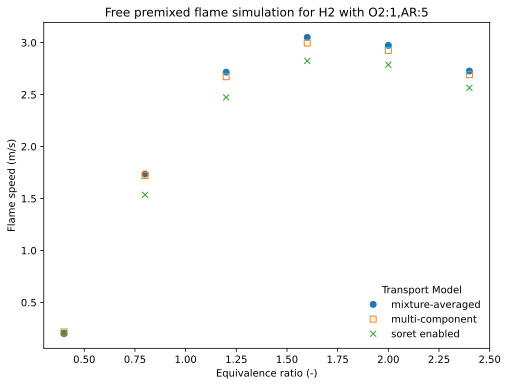

In [15]:
# create figure
fig, ax = plt.subplots(1)
fig.set_size_inches(8.,6.)

# plot results
u_mix = [ mix[t]['velocity'][0] for t in mix]
u_mlt = [ mlt[t]['velocity'][0] for t in mlt]
u_sor = [ sor[t]['velocity'][0] for t in sor]

ax.plot(phi, u_mix, marker='o', 
            linestyle='none', label='mixture-averaged') 
ax.plot(phi, u_mlt, marker='s', 
            markerfacecolor='none',
            linestyle='none', label='multi-component') 
ax.plot(phi, u_sor, marker='x', 
            markerfacecolor='none',
            linestyle='none', label='soret enabled') 

# add title/axis labels
ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

ax.set_title('Free premixed flame simulation for {} with {}'.format(up['fuel'],up['oxidizer']))

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Transport Model') # % mech)
_ = leg.draw_frame(False) 